In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
sales = pd.read_csv('kc_house_data.csv')


In [5]:
def get_numpy_data(data, features, output):
    data['intercept'] = 1
    features = ['intercept'] + features
    feature_matrix = np.array(data[features])
    output_array = np.array(data[output])
    
    return (feature_matrix, output_array)

In [6]:
def predict_output(feature_matrix, weights):
    predictions = np.dot(feature_matrix, weights)
    return (predictions)

In [29]:
def feature_derivative_ridge(errors, feature, weight, l2_penalty, feature_is_constant):
    
    RSS = 2*np.dot(np.array(errors), np.array(feature))
    if(feature_is_constant==True):
        return (RSS)
    weight = [weight]
    derivative = RSS + np.sum(np.array([(2*l2_penalty*weight[i]) for i in range(len(weight))]))
    #derivative = RSS + np.sum(np.array([(2*l2_penalty*weight[i]) for i in range(len(weight))]))
    
    return (derivative)

In [72]:
def derivative_cross_check(data, features, weights, l2_penalty=0):
    #Test the code
    (example_features, example_output) = get_numpy_data(data, features, 'price')

    test_predictions = predict_output(example_features, weights)
    errors = test_predictions - example_output # prediction errors

    # next two lines should print the same values
    print (feature_derivative_ridge(errors, example_features[:,1], weights[1], l2_penalty, False))
    print (np.sum(errors*example_features[:,1])*2 + 2*(l2_penalty)*weights[1])
    print ('')

    # next two lines should print the same values
    print (feature_derivative_ridge(errors, example_features[:,0], weights[0], l2_penalty, True))
    print (np.sum(errors)*2)


In [73]:
derivative_cross_check(sales, ['sqft_living'], np.array([1., 10.]))

-56554166815970.0
-56554166815970.0

-22446749330.0
-22446749330.0


In [74]:
def ridge_regression_gradient_descent(feature_matrix, output, initial_weights, step_size, l2_penalty, max_iterations=100):
    weights = np.array(initial_weights) # make sure it's a numpy array
    
    #while not reached maximum number of iterations:
    while(max_iterations>0):
        # compute the predictions using your predict_output() function
        predictions = predict_output(feature_matrix, weights)
        
        # compute the errors as predictions - output
        errors = (predictions - output)
        
        for i in range(len(weights)): # loop over each weight
            # Recall that feature_matrix[:,i] is the feature column associated with weights[i]
            # compute the derivative for weight[i].
            #(Remember: when i=0, you are computing the derivative of the constant!)
            
            if(i==0):
                derivative = feature_derivative_ridge(errors, feature_matrix[:, i], weights[i], l2_penalty, True)
            else:
                derivative = feature_derivative_ridge(errors, feature_matrix[:, i], weights[i], l2_penalty, False)
            
            # subtract the step size times the derivative from the current weight  
            weights[i] -= (step_size*derivative)
        max_iterations -= 1
    return weights

In [32]:
#Reading the training and testing data
train_data = pd.read_csv('kc_house_train_data.csv')
test_data = pd.read_csv('kc_house_test_data.csv')

In [33]:
simple_features = ['sqft_living']
my_output = 'price'
(simple_feature_matrix, output) = get_numpy_data(train_data, simple_features, my_output)
(simple_test_feature_matrix, test_output) = get_numpy_data(test_data, simple_features, my_output)

### 12. First, let’s consider no regularization. Set the L2 penalty to 0.0 and run your ridge regression algorithm to learn the weights of the simple model (described above). Use the following parameters:

### step_size = 1e-12
### max_iterations = 1000
### initial_weights = all zeros

In [75]:
#ridge_regression_gradient_descent(feature_matrix, output, initial_weights, step_size, l2_penalty, max_iterations=100)
simple_weights_0_penalty = ridge_regression_gradient_descent(simple_feature_matrix, output, [0.,0.], 1e-12, 0.0, 1000)

In [76]:
simple_weights_0_penalty

array([-1.63113515e-01,  2.63024369e+02])

### 13. Next, let’s consider high regularization. Set the L2 penalty to 1e11 and run your ridge regression to learn the weights of the simple model. Use the same parameters as above. Call your weights:

In [49]:
1e11/1e-12

1.0000000000000001e+23

In [77]:
#ridge_regression_gradient_descent(feature_matrix, output, initial_weights, step_size, l2_penalty, max_iterations=100)
simple_weights_high_penalty = ridge_regression_gradient_descent(simple_feature_matrix, output, [0., 0.], 1e-12, 1e11, 1000)

In [78]:
simple_weights_high_penalty

array([  9.76730382, 124.57217567])

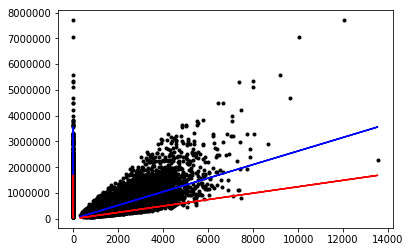

In [79]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(simple_feature_matrix,output,'k.',
        simple_feature_matrix,predict_output(simple_feature_matrix, simple_weights_0_penalty),'b-',
        simple_feature_matrix,predict_output(simple_feature_matrix, simple_weights_high_penalty),'r-')

### Quiz Question: What is the value of the coefficient for sqft_living that you learned with no regularization, rounded to 1 decimal place? What about the one with high regularization?

In [80]:
#No Regularization
2.63024369e+02

263.024369

In [81]:
#High Regularization
124.57

124.57

### Quiz Question: Comparing the lines you fit with the with no regularization versus high regularization, which one is steeper?

In [82]:
simple_weights_0_penalty

array([-1.63113515e-01,  2.63024369e+02])

### Quiz Question: What are the RSS on the test data for each of the set of weights above (initial, no regularization, high regularization)?

In [117]:
#Initial
prediction = predict_output(simple_test_feature_matrix, np.array([0,0]))
error = prediction-test_data['price']
print (np.sum(error**2))

1784273286136298.0


In [118]:
#No Regularization
#Initial
prediction = predict_output(simple_test_feature_matrix, simple_weights_0_penalty)
error = prediction-test_data['price']
print (np.sum(error**2))

275723632153607.44


In [119]:
#High Regularization
prediction = predict_output(simple_test_feature_matrix, simple_weights_high_penalty)
error = prediction-test_data['price']
print (np.sum(error**2))


694642101489902.5


### A model with 2 features

In [86]:
model_features = ['sqft_living', 'sqft_living15']
my_output = 'price'
(feature_matrix, output) = get_numpy_data(train_data, model_features, my_output)
(test_feature_matrix, test_output) = get_numpy_data(test_data, model_features, my_output)

### First, let’s consider no regularization. Set the L2 penalty to 0.0 and run your ridge regression algorithm. Use the following parameters:

### initial_weights = all zeros
### step size = 1e-12
### max_iterations = 1000

In [87]:
multiple_weights_0_penalty = ridge_regression_gradient_descent(feature_matrix, output, [0.,0.,0.], 1e-12, 0.0, 1000)

In [88]:
multiple_weights_0_penalty

array([ -0.35743483, 243.05416982,  22.41481497])

### Next, let’s consider high regularization. Set the L2 penalty to 1e11 and run your ridge regression to learn the weights of the simple model. Use the same parameters as above.

In [89]:
multiple_weights_high_penalty = ridge_regression_gradient_descent(feature_matrix, output, [0.,0.,0.], 1e-12, 1e11, 1000)

In [90]:
multiple_weights_high_penalty

array([ 6.74296579, 91.48927365, 78.43658766])

### Quiz Question: What is the value of the coefficient for ‘sqft_living’ that you learned with no regularization, rounded to 1 decimal place? What about the one with high regularization?

In [91]:
#No Regularization
243.05

243.05

In [92]:
#High Regularization
91.48

91.48

### Quiz Question: What are the RSS on the test data for each of the set of weights above (initial, no regularization, high regularization)?

### Quiz Question: What's the error in predicting the price of the first house in the test set using the weights learned with no regularization? What about with high regularization?

In [134]:
#Initial
prediction = predict_output(test_feature_matrix, np.array([0., 0., 0.]))
error = prediction-test_data['price']
print (np.sum(error**2))


1784273286136298.0


In [136]:
error_initial = error[0]
error_initial

-310000.0

In [137]:
#No Regularization\
prediction = predict_output(test_feature_matrix, multiple_weights_0_penalty)
error = prediction-test_data['price']
print (np.sum(error**2))

274067615918575.56


In [139]:
prediction[0] - test_data['price'][0]

77465.47605823533

In [138]:
error_No_Regularization = error[0]
error_No_Regularization

77465.47605823533

In [140]:
#High Regularization
prediction = predict_output(test_feature_matrix, multiple_weights_high_penalty)
error = prediction-test_data['price']
print (np.sum(error**2))

500404800500841.75


In [141]:
prediction[0] - test_data['price'][0]

-39546.46967805945

In [143]:
min(map(abs, [-39546.46967805945, 77465.47605823533, -310000.0]))

39546.46967805945

In [109]:
multiple_weights_0_penalty

array([ -0.35743483, 243.05416982,  22.41481497])

In [110]:
test_data['constant'] = 1

In [127]:
#No Regularization
error_No_Regularization


-310000.0